# Graphics and Visualization in Python

Python has a bewildering number of graphics libraries, catering to different needs. If you want a better understanding of the Python visualization landscape, see the following series of blog posts:

- [Python Data Visualization 2018: Why So Many Libraries?](https://www.anaconda.com/blog/developer-blog/python-data-visualization-2018-why-so-many-libraries/)
- [Python Data Visualization 2018: Moving Toward Convergence](https://www.anaconda.com/blog/developer-blog/python-data-visualization-moving-toward-convergence/)
- [Python Data Visualization 2018: Where Do We Go From Here?](https://www.anaconda.com/blog/developer-blog/python-data-visualization-2018-where-do-we-go-from-here/)

However for simple statistical plots, the `matplotlib` and `seaborn` libraries suffice most of the time:

- [Matplotlib tutorial](https://matplotlib.org/3.1.1/tutorials/index.html)
- [Matplotlib gallery](http://matplotlib.org/1.2.1/gallery.html)
- [Seaborn gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html#example-gallery)

As shown below, `pandas` also has useful plotting functionality.

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rng
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Pandas

You can do plots directly from a Series or DataFrame. See [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). Some interesting plots available in Pandas are

- Scatter matrix plots
- Andrews curves
- Autocorrelation plots
- Bootstrap plots

In [3]:
url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


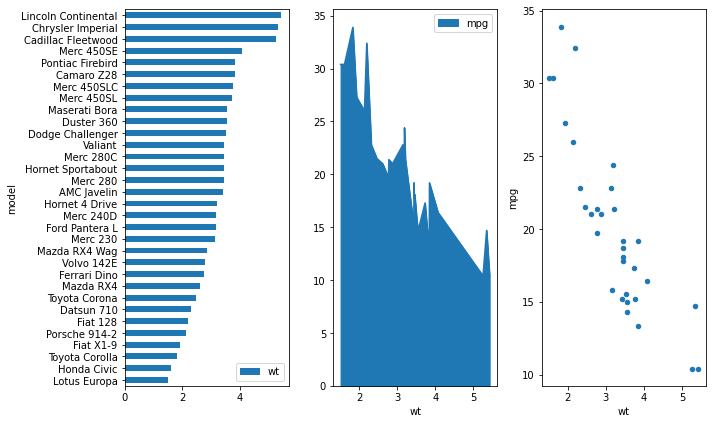

In [5]:
fig, axes = plt.subplots(1,3,figsize=(10, 6))
df.sort_values('wt').plot('model', 'wt', kind='barh', ax=axes[0])
df.sort_values('wt').plot('wt', 'mpg', kind='scatter', ax=axes[2])
df.sort_values('wt').plot('wt', 'mpg', kind='area', ax=axes[1])
plt.tight_layout()
pass

## Matplotlib

Matplotlib has a "functional" interface similar to Matlab via the `pyplot` module for simple interactive use, as well as an object-oriented interface that is useful for more complex graphic creations.

### Types of plots

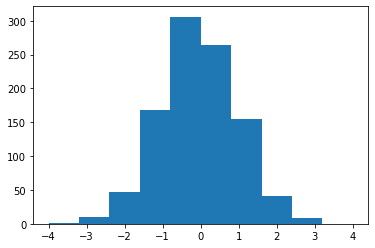

In [6]:
plt.hist(np.random.randn(1000), bins=np.linspace(-4,4,11))
pass

In [7]:
xs = [np.random.normal(mu, 0.5, (100)) for mu in range(5)]

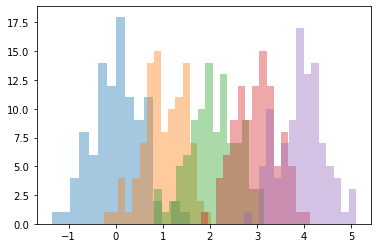

In [8]:
for x in xs:
    plt.hist(x, bins=15, alpha=0.4)

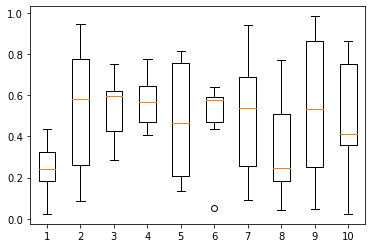

In [9]:
plt.boxplot(np.random.random((6,10)))
pass

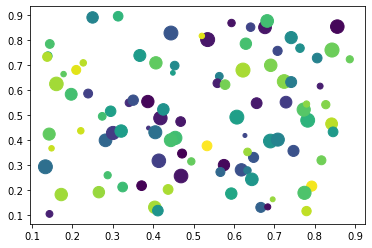

In [10]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100))
pass

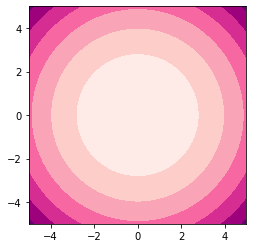

In [11]:
x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
plt.contourf(X, Y, Z, cmap=plt.cm.RdPu)
plt.axis('square')
pass

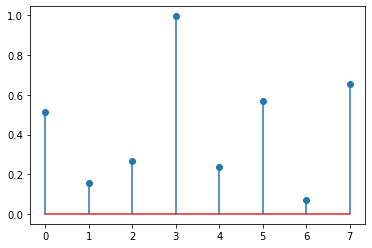

In [12]:
plt.stem(np.random.random(8))
plt.margins(0.05)
pass

In [13]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

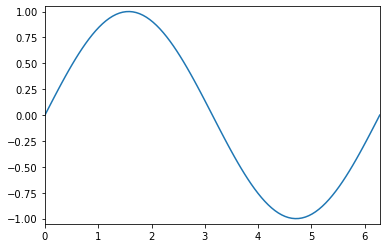

In [14]:
plt.plot(x, y)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
pass

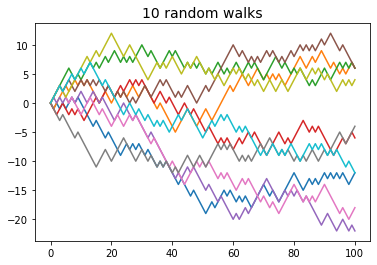

In [15]:
xs = np.c_[np.zeros(10), np.random.choice([-1,1], (10, 100)).cumsum(axis=1)]
plt.plot(xs.T)
plt.title('10 random walks', fontsize=14)
pass

### Displaying arrays

In [16]:
x = np.random.random((80, 80, 3))

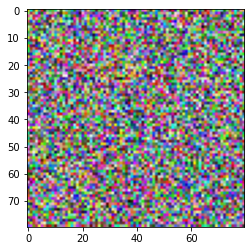

In [17]:
plt.imshow(x)
pass

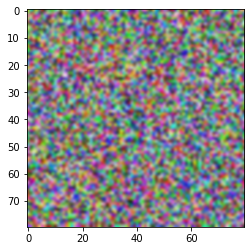

In [18]:
plt.imshow(x, interpolation='bicubic')
pass

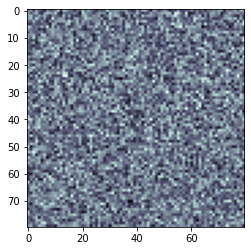

In [19]:
plt.imshow(x.mean(axis=-1), cmap='bone')
pass

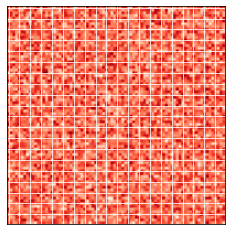

In [20]:
plt.imshow(x.mean(axis=-1), cmap='Reds')
plt.xticks(range(0, x.shape[1], 4))
plt.yticks(range(0, x.shape[0], 4))
plt.grid(color='white')
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
pass

### Colors

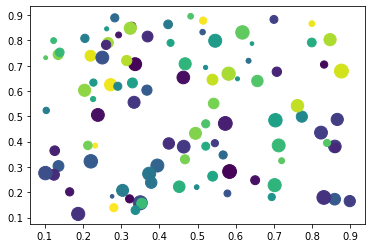

In [21]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100))
pass

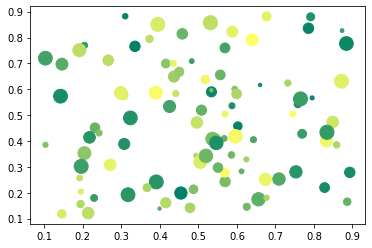

In [22]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100), cmap='summer')
pass

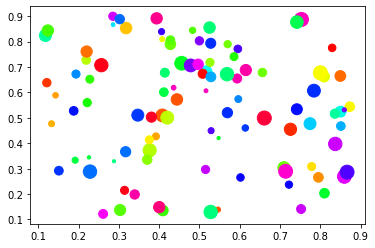

In [23]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=np.random.random(100), cmap='hsv')
pass

#### Getting a list of colors from a colormap

Giving an argument of 0.0 < x < 1.0 to a `colormap` gives the appropriate interpolated color.

In [24]:
# find the bottom, middle and top colors of the winter colormap
colors = plt.cm.winter(np.linspace(0, 1, 100))
colors[:3]

array([[0.        , 0.        , 1.        , 1.        ],
       [0.        , 0.00784314, 0.99607843, 1.        ],
       [0.        , 0.01960784, 0.99019608, 1.        ]])

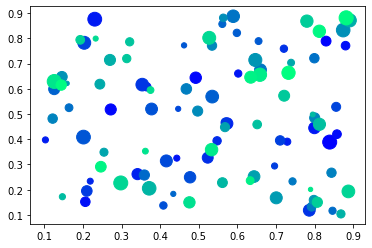

In [25]:
plt.scatter(*np.random.uniform(0.1, 0.9, (2,100)),
            s=np.random.randint(10, 200, 100), 
            c=colors)
pass

### Styles

In [26]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [27]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

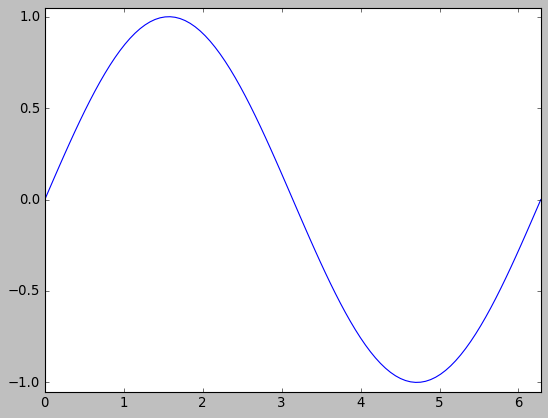

In [28]:
with plt.style.context('classic'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

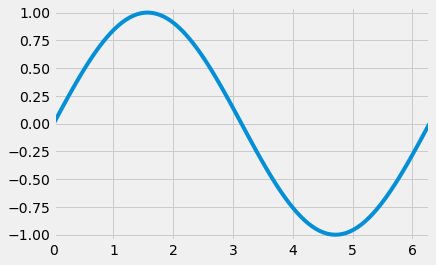

In [29]:
with plt.style.context('fivethirtyeight'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

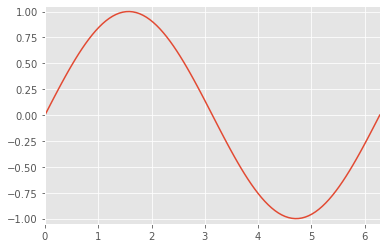

In [30]:
with plt.style.context('ggplot'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

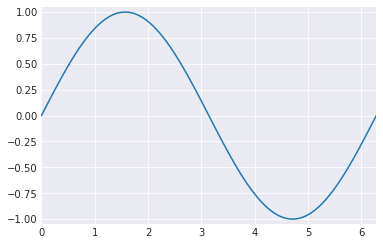

In [31]:
with plt.style.context('seaborn-darkgrid'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


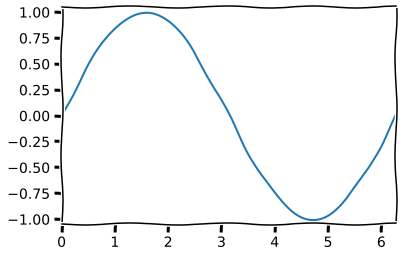

In [32]:
with plt.xkcd():
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Creating your own style

Many, many options can be configured.

In [33]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [34]:
%%file foo.mplstyle
axes.grid: True
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16

Writing foo.mplstyle


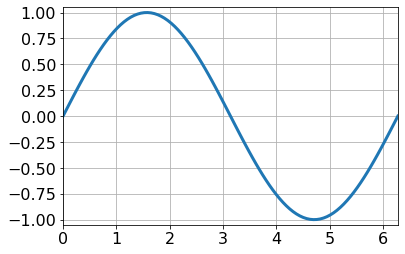

In [35]:
with plt.style.context('foo.mplstyle'):
    plt.plot(x, y)
    plt.axis([0, 2*np.pi, -1.05, 1.05,])

### Customizing plots

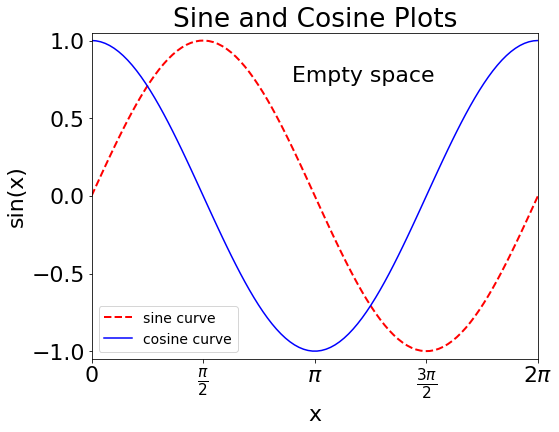

In [36]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
plt.plot(x, y, color='red', linewidth=2, linestyle='dashed', label='sine curve')
plt.plot(x, np.cos(x), 'b-', label='cosine curve')
plt.legend(loc='best', fontsize=14)
plt.axis([0, 2*np.pi, -1.05, 1.05,])
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks([0,0.5*np.pi,np.pi,1.5*np.pi,2*np.pi], 
           [0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.title('Sine and Cosine Plots')
plt.text(0.45, 0.9, 'Empty space', transform=ax.transAxes, ha='left', va='top')
pass

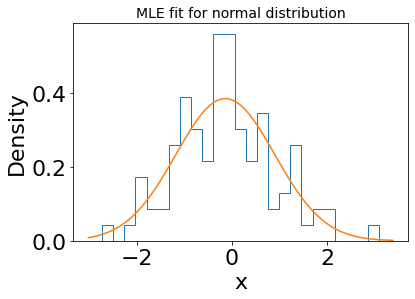

In [37]:
x = np.random.randn(100)
plt.hist(x, bins=25, histtype='step', density=True)
mu, sigma = stats.norm.fit(x)
xp = np.linspace(*plt.xlim(), 100)
plt.plot(xp, stats.norm(mu, sigma).pdf(xp))
plt.xlabel('x')
plt.ylabel('Density')
plt.title('MLE fit for normal distribution', fontsize=14)
pass

### Layouts

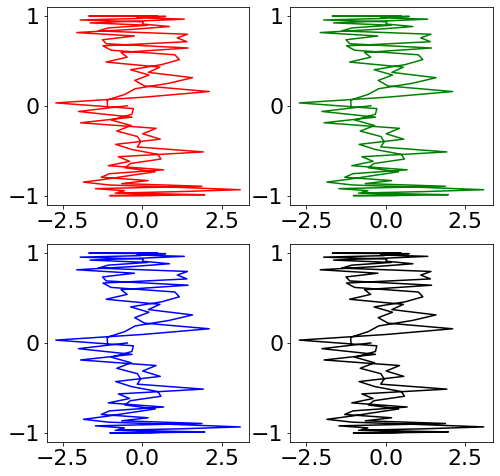

In [38]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0].plot(x,y, 'r')
axes[0,1].plot(x,y, 'g')
axes[1,0].plot(x,y, 'b')
axes[1,1].plot(x,y, 'k')
for ax in axes.ravel():
    ax.margins(0.05)
pass

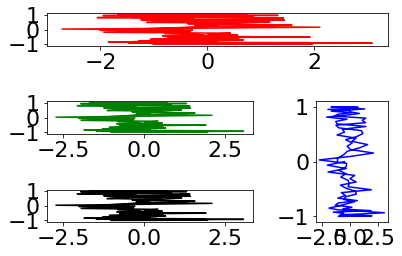

In [39]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0), colspan=2)
axes = [ax1, ax2, ax3, ax4]
colors = ['r', 'g', 'b', 'k']
for ax, c in zip(axes, colors):
    ax.plot(x, y, c)
    ax.margins(0.05)
plt.tight_layout()

## Seaborn

Seaborn is a library for statistical visualizations. 

In [40]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### Density plots

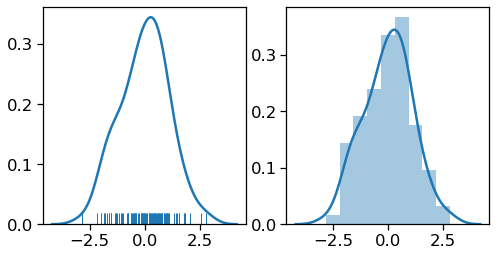

In [41]:
xs = rng.normal(0,1,100)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

### Kernel density estimate

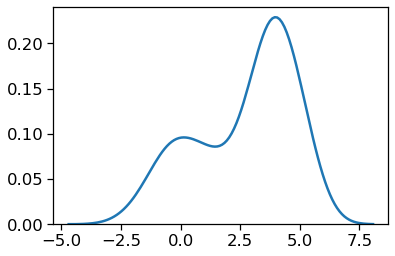

In [42]:
sns.kdeplot(np.r_[rng.normal(0,1,50), rng.normal(4,0.8,100)])
pass

In [43]:
iris = sns.load_dataset('iris')

In [44]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Joint distribution plot

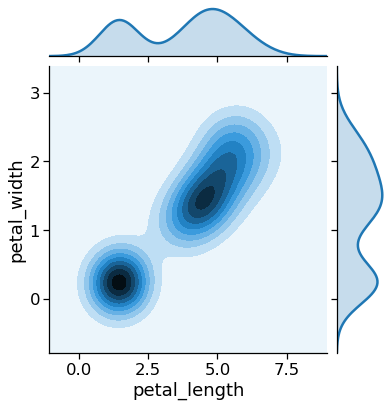

In [45]:
sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='kdeplot')
pass

### Box and violin plots

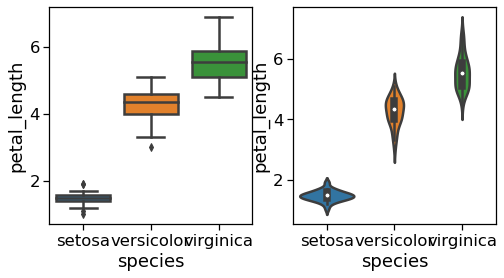

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.boxplot(x='species', y='petal_length', data=iris, ax=axes[0])
sns.violinplot(x='species', y='petal_length', data=iris, ax=axes[1])
pass

### Composite plots

In [47]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


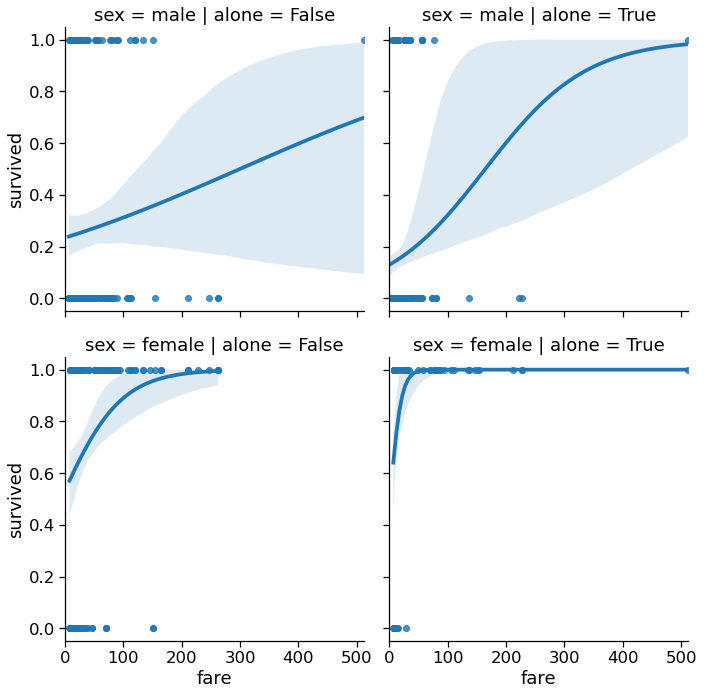

In [49]:
sns.lmplot(x='fare', y='survived', col='alone', row='sex', data=titanic, logistic=True)
pass

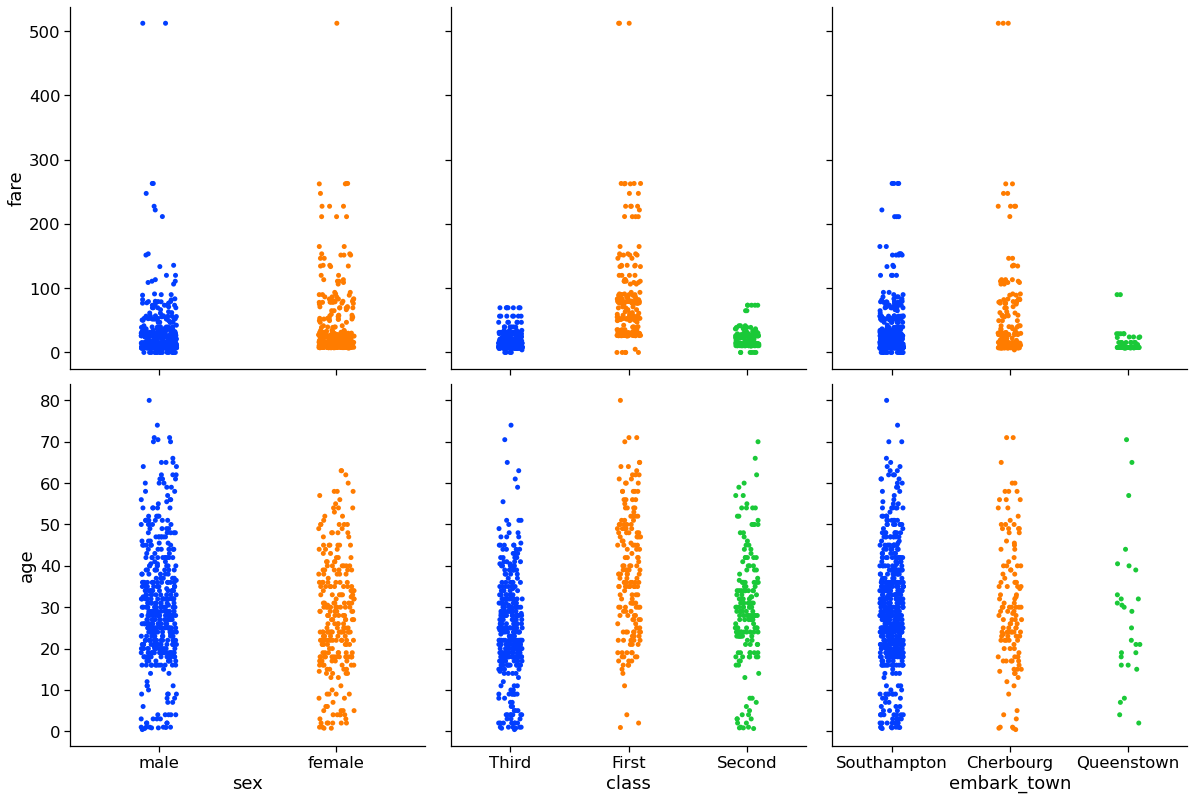

In [50]:
g = sns.PairGrid(titanic,
                 y_vars=['fare', 'age'],
                 x_vars=['sex', 'class', 'embark_town' ],
                 aspect=1, size=5.5)
g.map(sns.stripplot, jitter=True, palette="bright")
pass

### Sometimes you need to manipulate the data frame before plotting

In [51]:
iris_tall = pd.melt(iris, id_vars='species')
iris_tall.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


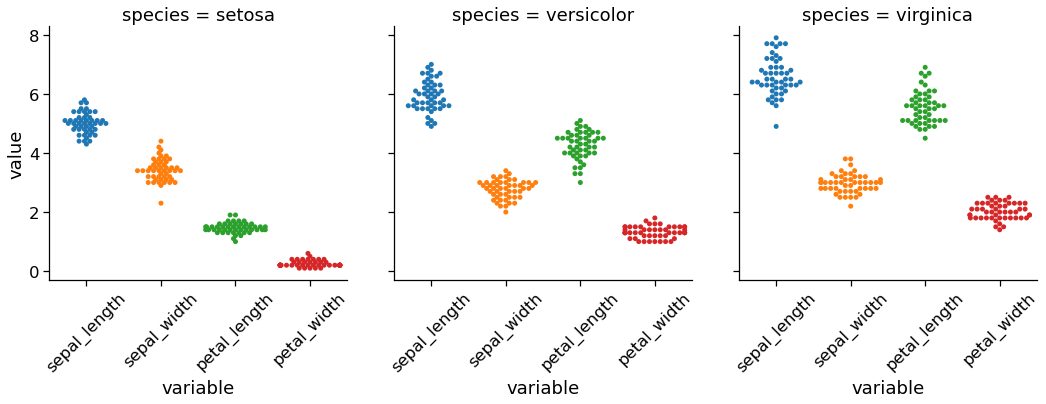

In [52]:
g = sns.catplot(data=iris_tall, 
                x='variable', 
                y='value', 
                col='species',
                kind='swarm')
g.set_xticklabels(rotation=45)
pass

### Seaborn styles (themes)

In [53]:
sns.set_style('ticks')

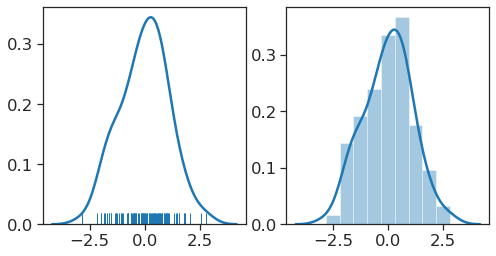

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

In [55]:
sns.set_style('dark')

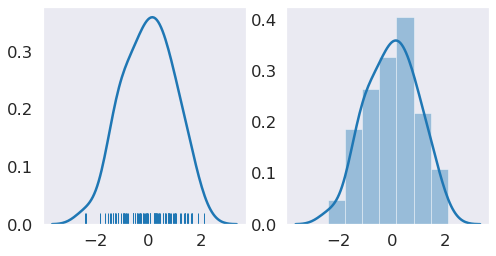

In [56]:
xs = rng.normal(0,1,100)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

In [57]:
sns.set_style('darkgrid')

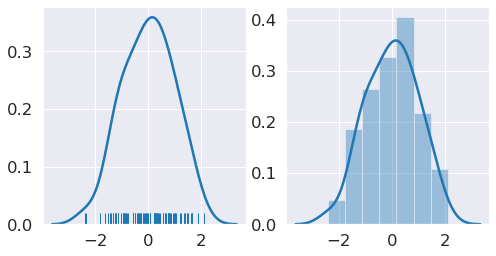

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(xs, hist=False, rug=True, ax=axes[0]);
sns.distplot(xs, hist=True, ax=axes[1])
pass

## plotnine


If you just want a clone of `ggplot2` in Python, check out [plotnine](https://plotnine.readthedocs.io/en/latest/gallery.html)

### Grammar of Graphics

![](https://blog.gramener.com/wp-content/uploads/2018/11/7-layers-of-grammar-of-graphics-to-tell-powerful-data-stories-3.png)

Source: http://blog.gramener.com/grammar-of-graphics-data-stories/

findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


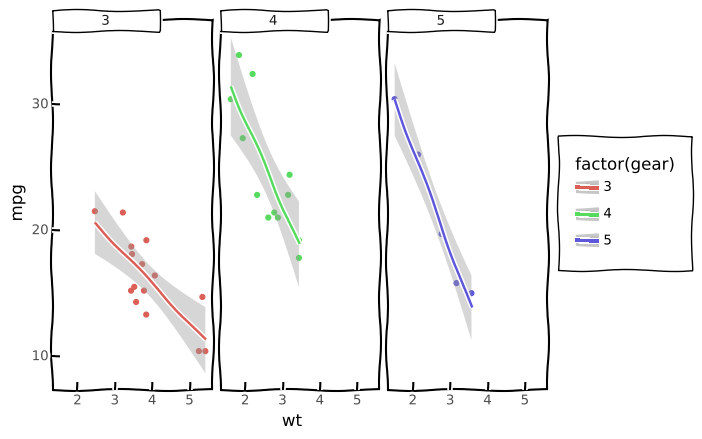

<ggplot: (8753897353937)>

In [59]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, theme_xkcd
from plotnine.data import mtcars

(
    ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
    + geom_point()
    + stat_smooth(method='lm')
    + facet_wrap('~gear')
    + theme_xkcd()
)